## l’évolution du nombre de buts d’une équipe en fonction de la météo (pluviométrie, température)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from db import *

In [3]:
df = read_db("SELECT * FROM teams")
df

,id,championship_id,name,city,coach_name,rank,created_at,updated_at
0,1,1,Angers Sporting Club de l'Ouest,Angers,Gérald BATICLE,44,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
1,2,1,Football Club des Girondins de Bordeaux,Bordeaux,Jean-Louis GASSET,45,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
2,3,1,Stade Brestois 29,Brest,Michel DER ZAKARIAN,41,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
3,4,1,Dijon Football Côte-d'Or,Dijon,David LINARES,21,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
4,5,1,Racing Club de Lens,Lens,Franck HAISE,57,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
5,6,1,LOSC Lille,Lille,Christophe GALTIER,83,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
6,7,1,Football Club Lorient-Bretagne Sud,Lorient,Christophe PELISSIER,42,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
7,8,1,Olympique Lyonnais,Lyon,Peter BOSZ,76,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
8,9,1,Olympique de Marseille,Marseille,Jorge SAMPAOLI,60,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113
9,10,1,Football Club de Metz,Metz,Frédéric ANTONETTI,47,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113


In [4]:
read_db("""SELECT *
FROM teams
INNER JOIN teams_matches ON teams.id = teams_matches.team_id""")

,id,championship_id,name,city,coach_name,rank,created_at,updated_at,id,match_id,team_id,home,team_goals,points,created_at,updated_at
0,2,1,Football Club des Girondins de Bordeaux,Bordeaux,Jean-Louis GASSET,45,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,1,1,2,1,0,1,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565
1,4,1,Dijon Football Côte-d'Or,Dijon,David LINARES,21,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,2,2,4,1,0,0,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565
2,6,1,LOSC Lille,Lille,Christophe GALTIER,83,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,3,3,6,1,1,1,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565
3,11,1,Association sportive de Monaco FC,Monaco,Niko KOVAC,78,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,4,4,11,1,2,1,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565
4,7,1,Football Club Lorient-Bretagne Sud,Lorient,Christophe PELISSIER,42,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,5,5,7,1,3,3,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,15,1,Nîmes Olympique,Nîmes,Pascal PLANCQUE,35,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,756,376,15,0,0,0,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565
756,12,1,Montpellier-Herault Sport Club,Montpellier,Olivier DALL'OGLIO,54,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,757,377,12,0,2,3,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565
757,4,1,Dijon Football Côte-d'Or,Dijon,David LINARES,21,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,758,378,4,0,1,3,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565
758,2,1,Football Club des Girondins de Bordeaux,Bordeaux,Jean-Louis GASSET,45,2021-07-01 11:24:36.283421,2021-07-01 11:24:36.285113,759,379,2,0,2,3,2021-07-02 11:07:34.093920,2021-07-02 11:07:34.571565


In [5]:
read_db("""SELECT teams.name,teams_matches.match_id, teams_matches.team_goals
FROM teams
INNER JOIN teams_matches ON teams.id = teams_matches.team_id""")

,name,match_id,team_goals
0,Football Club des Girondins de Bordeaux,1,0
1,Dijon Football Côte-d'Or,2,0
2,LOSC Lille,3,1
3,Association sportive de Monaco FC,4,2
4,Football Club Lorient-Bretagne Sud,5,3
...,...,...,...
755,Nîmes Olympique,376,0
756,Montpellier-Herault Sport Club,377,2
757,Dijon Football Côte-d'Or,378,1
758,Football Club des Girondins de Bordeaux,379,2


In [6]:
df1 = read_db("""SELECT teams.name,teams_matches.match_id, teams_matches.team_goals, matchs.temperature, matchs.rainfall
FROM teams
INNER JOIN teams_matches ON teams.id = teams_matches.team_id
INNER JOIN matchs ON teams_matches.match_id = matchs.id 
WHERE teams.name = "LOSC Lille"
""" )
df1

,name,match_id,team_goals,temperature,rainfall
0,LOSC Lille,3,1,21.000000,1.000000
1,LOSC Lille,24,1,26.000000,4.277397
2,LOSC Lille,41,2,12.000000,8.000000
3,LOSC Lille,70,4,13.000000,2.000000
4,LOSC Lille,89,1,17.000000,1.000000
5,LOSC Lille,109,4,11.000000,4.000000
6,LOSC Lille,124,2,5.000000,4.277397
7,LOSC Lille,139,2,7.000000,1.000000
8,LOSC Lille,160,0,9.000000,0.000000
9,LOSC Lille,177,1,3.000000,2.000000


<AxesSubplot:xlabel='team_goals', ylabel='Count'>

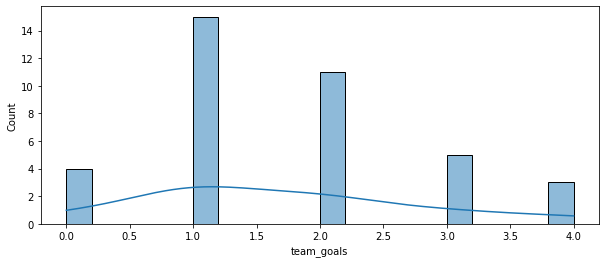

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)

sns.histplot(df1, x="team_goals", bins=20, kde=True)

<AxesSubplot:xlabel='temperature', ylabel='team_goals'>

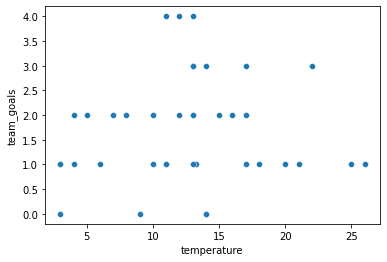

In [8]:
sns.scatterplot(x='temperature', y='team_goals', data=df1)

<AxesSubplot:xlabel='rainfall', ylabel='team_goals'>

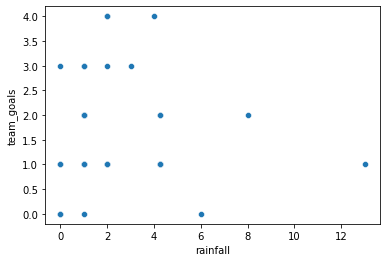

In [9]:
sns.scatterplot(x='rainfall', y='team_goals', data=df1)

In [10]:
df2 = read_db("""SELECT teams.name,teams_matches.match_id, teams_matches.team_goals, matchs.temperature, matchs.rainfall
FROM teams
INNER JOIN teams_matches ON teams.id = teams_matches.team_id
INNER JOIN matchs ON teams_matches.match_id = matchs.id
""" )
df2

,name,match_id,team_goals,temperature,rainfall
0,Football Club des Girondins de Bordeaux,1,0,24.000000,5.000000
1,Dijon Football Côte-d'Or,2,0,26.000000,19.000000
2,LOSC Lille,3,1,21.000000,1.000000
3,Association sportive de Monaco FC,4,2,27.000000,1.000000
4,Football Club Lorient-Bretagne Sud,5,3,19.000000,1.000000
...,...,...,...,...,...
755,Nîmes Olympique,376,0,15.000000,2.000000
756,Montpellier-Herault Sport Club,377,2,16.000000,1.000000
757,Dijon Football Côte-d'Or,378,1,13.279778,4.277397
758,Football Club des Girondins de Bordeaux,379,2,14.000000,1.000000


Text(0, 0.5, 'Nombre de buts')

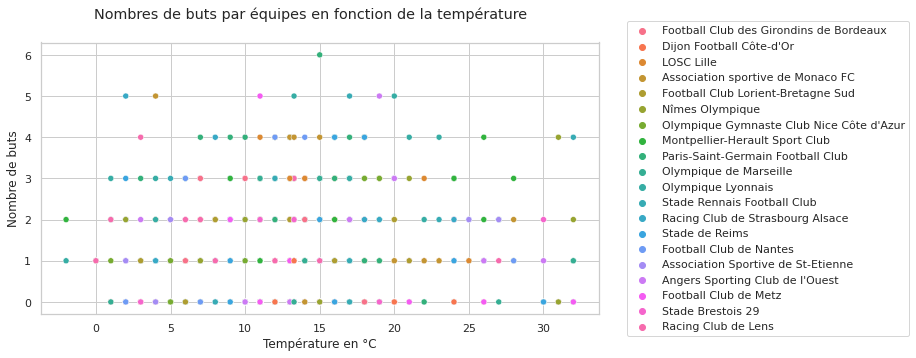

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temperature', y='team_goals', hue='name', data= df2)
plt.legend(loc='center left',bbox_to_anchor=(1.04,0.5))
plt.suptitle('Nombres de buts par équipes en fonction de la température')
plt.xlabel('Température en °C')
plt.ylabel('Nombre de buts')

Text(0, 0.5, 'Nombre de buts')

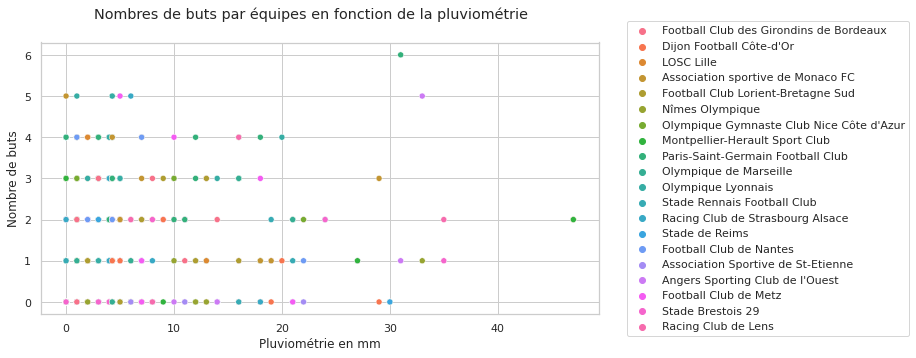

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='rainfall', y='team_goals', hue='name', data= df2)
plt.legend(loc='center left',bbox_to_anchor=(1.04,0.5))
plt.suptitle('Nombres de buts par équipes en fonction de la pluviométrie')
plt.xlabel('Pluviométrie en mm')
plt.ylabel('Nombre de buts')

## l’évolution du nombre de buts d’un joueur en fonction de la météo (pluviométrie, température)

In [40]:
df3 = read_db("""SELECT players.full_name,goals.player_id,matchs.id, matchs.temperature, matchs.rainfall
FROM players
INNER JOIN goals ON players.id = goals.player_id
INNER JOIN matchs ON goals.match_id = matchs.id
""" )
df3

,full_name,player_id,id,temperature,rainfall
0,I. Traoré,14,2,26.0,19.0
1,J. Bamba,176,3,21.0,1.0
2,D. Da Silva,549,3,21.0,1.0
3,A. Disasi,322,4,27.0,1.0
4,B. Badiashile,320,4,27.0,1.0
...,...,...,...,...,...
997,E. Touré,544,379,14.0,1.0
998,Y. Adli,53,379,14.0,1.0
999,E. Kwateng,48,379,14.0,1.0
1000,H. Diallo,642,380,16.0,2.0


Text(0, 0.5, 'Nombre de buts')

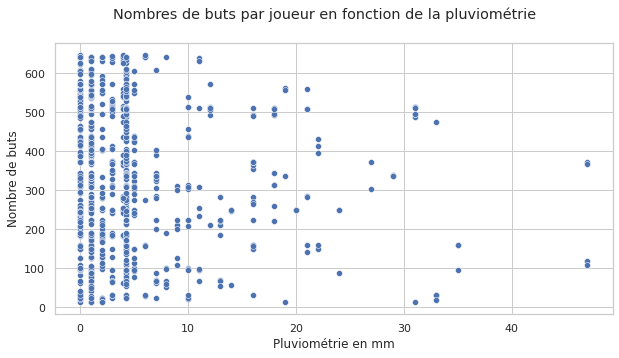

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='rainfall', y='player_id', data= df3)
plt.suptitle('Nombres de buts par joueur en fonction de la pluviométrie')
plt.xlabel('Pluviométrie en mm')
plt.ylabel('Nombre de buts')

Text(0, 0.5, 'Nombre de buts')

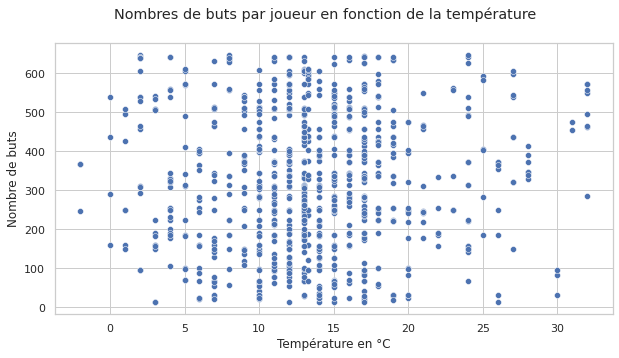

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temperature', y='player_id', data= df3)
plt.suptitle('Nombres de buts par joueur en fonction de la température')
plt.xlabel('Température en °C')
plt.ylabel('Nombre de buts')

<AxesSubplot:xlabel='rainfall', ylabel='Count'>

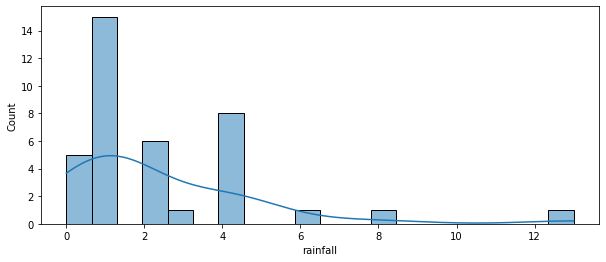

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)

sns.histplot(df1, x="rainfall", bins=20, kde=True)

In [17]:
df4 = read_db("""SELECT teams.name,teams_matches.match_id, teams_matches.team_goals, matchs.temperature, matchs.rainfall,teams_matches.home
FROM teams
INNER JOIN teams_matches ON teams.id = teams_matches.team_id
INNER JOIN matchs ON teams_matches.match_id = matchs.id 
""" )
df4

,name,match_id,team_goals,temperature,rainfall,home
0,Football Club des Girondins de Bordeaux,1,0,24.000000,5.000000,1
1,Dijon Football Côte-d'Or,2,0,26.000000,19.000000,1
2,LOSC Lille,3,1,21.000000,1.000000,1
3,Association sportive de Monaco FC,4,2,27.000000,1.000000,1
4,Football Club Lorient-Bretagne Sud,5,3,19.000000,1.000000,1
...,...,...,...,...,...,...
755,Nîmes Olympique,376,0,15.000000,2.000000,0
756,Montpellier-Herault Sport Club,377,2,16.000000,1.000000,0
757,Dijon Football Côte-d'Or,378,1,13.279778,4.277397,0
758,Football Club des Girondins de Bordeaux,379,2,14.000000,1.000000,0


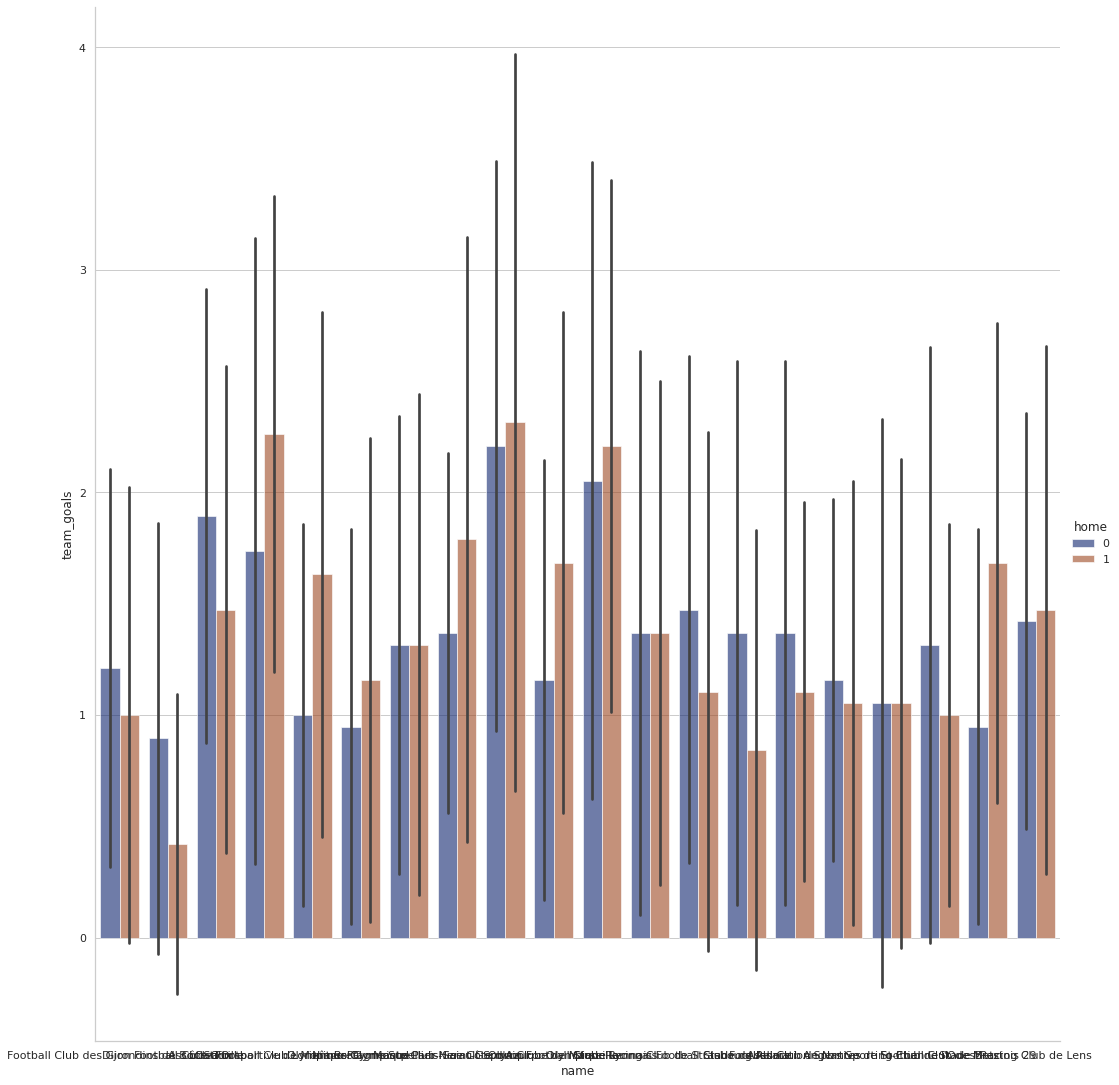

In [18]:
sns.set_theme(style="whitegrid")

sns.catplot(
    data = df4, kind="bar",
    x="name", y="team_goals", hue="home",
    ci="sd", palette="dark", alpha=.6, height=15
)
#g.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
#g.legend.set_title("")

In [19]:
df5 = read_db("""SELECT COUNT("goals.player_id") AS nombre_de_buts, players.position
FROM players
INNER JOIN goals ON players.id = goals.player_id
GROUP BY players.position
""" )
df5

,nombre_de_buts,position
0,583,Att.
1,149,Déf.
2,270,Mil.


In [20]:
df6 = read_db("""SELECT COUNT("goals.player_id") AS nombre_de_buts, goals.goal_type
FROM goals
GROUP BY goals.goal_type
""" )
df6

,nombre_de_buts,goal_type
0,890,normal
1,26,own_goal
2,133,penalty


<AxesSubplot:xlabel='position', ylabel='nombre_de_buts'>

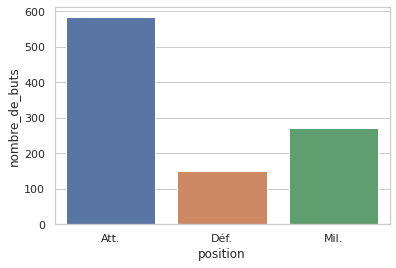

In [21]:
sns.barplot(x="position", y="nombre_de_buts", data=df5)

<AxesSubplot:xlabel='goal_type', ylabel='nombre_de_buts'>

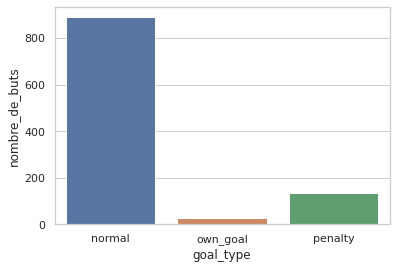

In [22]:
sns.barplot(x="goal_type", y="nombre_de_buts", data=df6)
